### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [65]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import r2_score


warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Загрузка данных о ценах на недвижимость в Бостоне 
boston_dataset = fetch_openml(data_id=531, as_frame=True)
X = boston_dataset.data
y = boston_dataset.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


Итерации остановлены на шаге 37


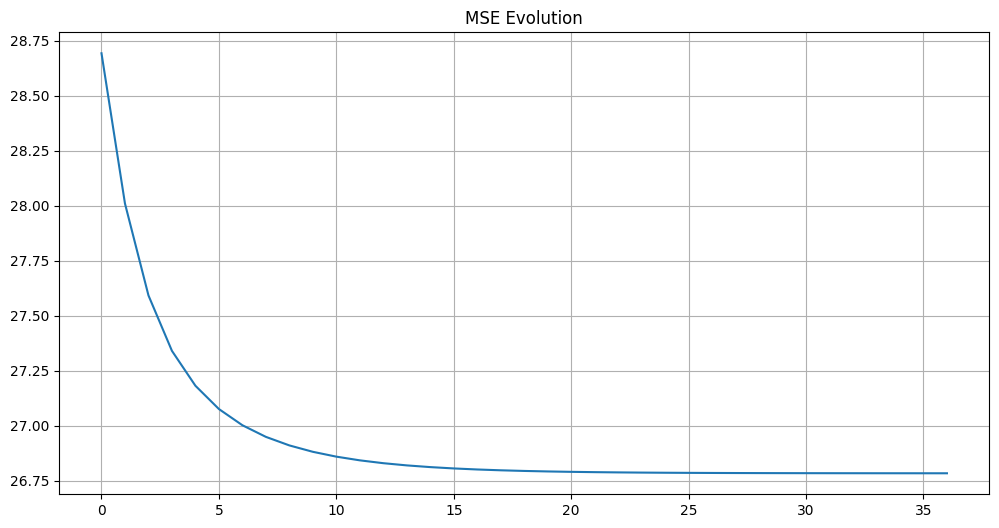

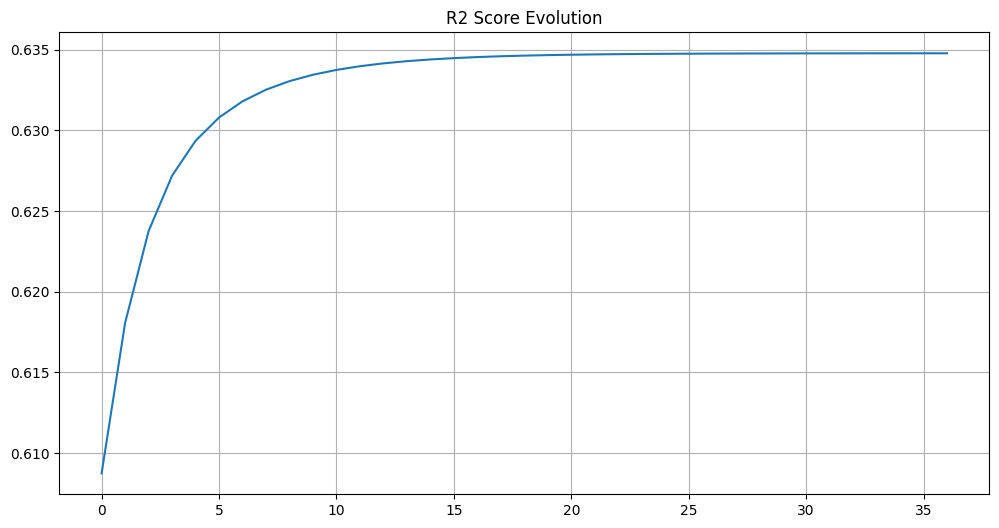

In [66]:
sgd = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(X_train_scaled.shape[1]), 0.0001
weight_evolution, mse_evolution, r2_evolution = [], [], [] # изменения весов и ошибка на валидации

for step in list(range(800)):
    sgd = sgd.partial_fit(X_train_scaled, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd.coef_))

    if weight_evolution[-1] < epsilon:
        print("Итерации остановлены на шаге %d" % step); break
    
    mse_evolution.append(mean_squared_error(y_valid, sgd.predict(X_valid_scaled)))
    r2_evolution.append(r2_score(y_valid, sgd.predict(X_valid_scaled)))

    w_current = sgd.coef_.copy()

plt.figure(figsize=(12, 6))
plt.plot(range(step), mse_evolution)
plt.title('MSE Evolution')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(step), r2_evolution)
plt.title('R2 Score Evolution')
plt.grid(True)
plt.show()